<a href="https://colab.research.google.com/github/subbu27iitb/Deep-Learning/blob/main/CNN_Sample_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=1Ckh6Dd3S7g

https://www.youtube.com/watch?v=WZdxt9xatrY

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, Conv3D

In [ ]:
model_cnn= Sequential([
    Conv2D(64,3,input_shape=(128,128,1), use_bias=True),
    MaxPooling2D(pool_size=4),
    Flatten(),
    Dropout(0.5),
    Dense(1, activation='softmax')
])

In [ ]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 61504)             0         
                                                                 
 dropout (Dropout)           (None, 61504)             0         
                                                                 
 dense (Dense)               (None, 1)                 61505     
                                                                 
Total params: 62,145
Trainable params: 62,145
Non-trainable params: 0
____________________________________________________

In [ ]:
model_cnn.save('simple_cnn.h5')

In [ ]:
input_shape=(4,28,28,3)

In [ ]:
X= tf.random.normal(input_shape)
print(X.shape)
Y1=Conv2D(2,2, activation='relu')(X)# Q-won't it take input_shape[1:] by default ?
#Y2=Conv2D(2,2, activation='relu',input_shape=input_shape[1:])(X)
print(Y1.shape)
#print(Y2.shape)
#Y1[0][1]-Y2[0][1]

(4, 28, 28, 3)
(4, 27, 27, 2)
(4, 27, 27, 2)


In [ ]:
Z=MaxPooling2D(pool_size=3)(Y1)
print(Z.shape)
Z1=MaxPooling2D(pool_size=3, strides=1)(Y1)
print(Z1.shape)
Z2=MaxPooling2D(pool_size=3, strides=3)(Y1)
print(Z2.shape)
Z3=MaxPooling2D(pool_size=3, strides=4)(Y1)
print(Z3.shape)

(4, 9, 9, 2)
(4, 25, 25, 2)
(4, 9, 9, 2)
(4, 7, 7, 2)


In [ ]:
ab=Flatten()(Z)
print(ab.shape)

(4, 162)


In [ ]:
abz=Dropout(0.2, seed=10)(ab)
print(abz.shape)

(4, 162)


In [ ]:
final=Dense(10, activation='softmax')(abz)
print(final.shape)
print(final)

(4, 10)
tf.Tensor(
[[0.00214481 0.0043423  0.5920888  0.28099573 0.00345254 0.01508917
  0.00912864 0.06699942 0.00489289 0.02086566]
 [0.00086264 0.05609525 0.27554867 0.29066688 0.00402047 0.06760716
  0.03893993 0.19812688 0.01254352 0.05558861]
 [0.00105284 0.00279363 0.51392317 0.2899462  0.00189431 0.03984149
  0.02045332 0.10676509 0.00063227 0.02269761]
 [0.00164802 0.00189216 0.54510564 0.09720758 0.00255613 0.00470637
  0.12572297 0.20526415 0.00266432 0.01323275]], shape=(4, 10), dtype=float32)


In [ ]:
final=Dense(10, activation='relu')(abz)
print(final.shape)
print(final)

(4, 10)
tf.Tensor(
[[3.0086718  1.3957922  0.32516903 0.         0.         0.
  0.         0.69191456 2.6305225  2.8889086 ]
 [2.0496602  0.8380851  2.3338237  0.         0.         0.
  0.         1.023658   2.221658   0.        ]
 [0.8140803  3.2857566  0.         0.         0.         0.
  0.         0.5624331  2.681767   2.2395878 ]
 [3.3274634  1.1346226  1.5103183  0.0389055  0.         0.
  0.         0.05799961 3.2189908  1.1245079 ]], shape=(4, 10), dtype=float32)


1. How to see the kernals used in Conv2D?
2. WHat is difference b/w conv1d and conv2D and conv3D ?

#Model CNN for MNIST dataset

https://www.youtube.com/watch?v=1Ckh6Dd3S7g

https://github.com/prodramp/python-projects/blob/main/deeplearning/cnn/mnist_cnn.ipynb

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.models import Model, Sequential
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Mnist data train, test split
(x_train,y_train), (x_test,y_test)= keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
*******************
3


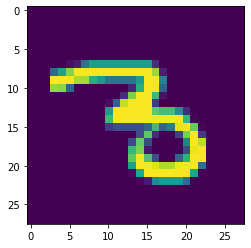

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print("*******************")
print(y_train[30])
plt.imshow(x_train[30])
#plt.imshow(x_test[100])


**1. Scale x_train& x_test**

**2. Expand x_train & xtest dimensions**

**3. Convert y_train & y_test to categorical**

In [ ]:
#Scale x_train & x_test
#should be run only once
x_train= x_train/255.0
x_test=x_test/255.0
x_train[0]
x_train[0].dtype

dtype('float64')

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_test[999].shape)

(60000, 28, 28)
(10000, 28, 28)
(28, 28)


**Expand x_train & x_test dimension**

In [ ]:
#Expand x_train & x_test dimension
#run only once
import numpy as np
x_train=np.expand_dims(x_train,-1)
x_test= np.expand_dims(x_test,-1)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_test[999].shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(28, 28, 1)


**Convert labels to categorical variables (y_train & y_test)**

In [ ]:
num_classes=10
y_train= keras.utils.to_categorical(y_train,num_classes) #should be run only once
y_test=keras.utils.to_categorical(y_test,num_classes) ##should be run only once

In [ ]:
y_test=keras.utils.to_categorical(y_test,num_classes)

**Model definition**

In [ ]:
input_shape=(28,28,1)

In [ ]:
model_cnn= Sequential([
    Conv2D(32,3,input_shape=input_shape,activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(64,3,activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dropout(0.5),
    Dense(num_classes,activation='softmax'),
])

In [ ]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Model Training**

In [ ]:
batch_size=64
epochs=2
model_cnn.fit(x_train,y_train,batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2
844/844 [==============================] - 15s 8ms/step - loss: 0.2785 - accuracy: 0.9156 - val_loss: 0.0717 - val_accuracy: 0.9808
Epoch 2/2
844/844 [==============================] - 4s 5ms/step - loss: 0.0971 - accuracy: 0.9706 - val_loss: 0.0481 - val_accuracy: 0.9865


In [ ]:
#Evaluation
score=model_cnn.evaluate(x_test,y_test)
print("Test loss: ", score[0])
print("Test_accuracy: ", score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0469 - accuracy: 0.9851
Test loss:  0.046871136873960495
Test_accuracy:  0.9850999712944031


**Evaluation**

(28, 28, 1)
(28, 28)
(28, 28, 1)


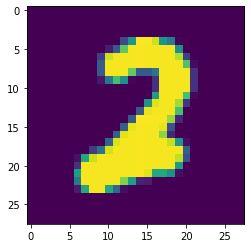

In [ ]:
print(x_test[199].shape)
test_img=x_test[199]
test_img_new=test_img[:,:,0]
print(test_img_new.shape)
plt.imshow(test_img_new)
print(x_test[199].shape)

In [ ]:
pred=model_cnn.predict(np.array([x_test[199]]))
#model_cnn.predict(np.array(x_test[999]))
pred_class=np.argmax(pred)
pred_class

1/1 [==============================] - 0s 128ms/step


2

In [ ]:
#print(x_test[199])
#print(test_img_new)
np.array(x_test[199])

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

Queries:
1. Why should the x_train & x_test dimensions to be changed from (:,28,28) to (:,28,28,1)
2. Why should the input_shape to have 3 dimensions before applying to CNN model.i.e., input_shape=(28,28,1) instead of (28,28)
3. WHile predicting the test point, why shd it be converted to np.array() ? During training x_train was not converted to np.array().